# LOTTERY DRAFT SIMULATOR

In [6]:
tickets = {'12th': 6, '11th': 5, '10th': 4,
           '9th': 3, '8th': 2, '7th': 1}

protections = {3: '12th', 4 : '11th', 5 : '10th'}

In [12]:
import copy
import random

def draft_sim(tickets, protections):
    
    temp_tickets = copy.deepcopy(tickets)
    winners = []

    for pick_no in range(1,len(temp_tickets)+1):
        
        if pick_no in protections:
            if protections[pick_no] not in winners:
                winner = protections[pick_no]
                winners.append(winner)
                temp_tickets.pop(winner)
                continue
        
        draft_outcomes = []
        for ticket in temp_tickets:
            no_tickets = temp_tickets[ticket]
            draft_outcomes.extend([ticket]*no_tickets)

        selection = random.randint(0,len(draft_outcomes)-1)
        winner = draft_outcomes[selection]
        winners.append(winner)
        temp_tickets.pop(winner)
    
    return winners

def get_summary_total(sim_results, tickets, isProb = True):
    teams = copy.deepcopy(tickets)
    no_simulations = len(sim_results)
    summary = {}
    
    for team in teams:
        team_dict = dict(zip(list(range(1,len(teams)+1)),[0]*len(teams)))
        for i in range(no_simulations):
            team_dict[sim_results[i].index(team)+1] += 1
        if isProb:
            team_dict = {key : team_dict[key]/no_simulations for key in team_dict}
        summary[team] = team_dict
        
    return summary

In [13]:
no_simulations = 100000
results_with_protection = []
results_without_protection = []

#############WITH PROTECTIONS###############
for i in range(no_simulations):
    results_with_protection.append(draft_sim(tickets,protections))

#############WITHOUT PROTECTIONS###############
for i in range(no_simulations):
    results_without_protection.append(draft_sim(tickets,{}))

In [14]:
with_protection = get_summary_total(results_with_protection, tickets)
without_protection = get_summary_total(results_without_protection, tickets)

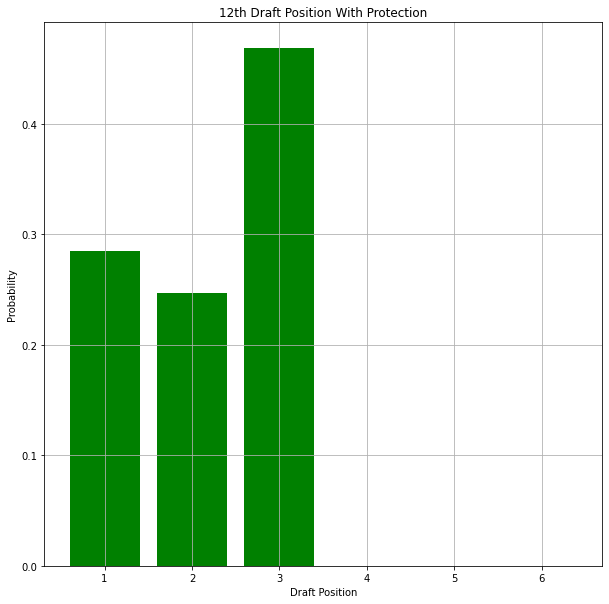

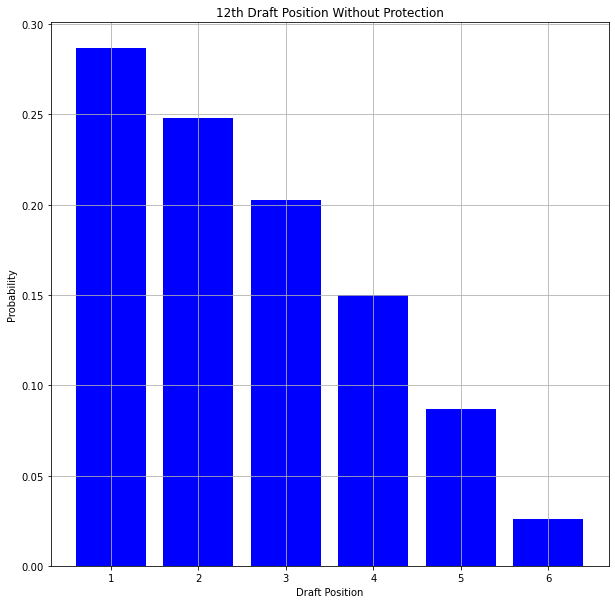

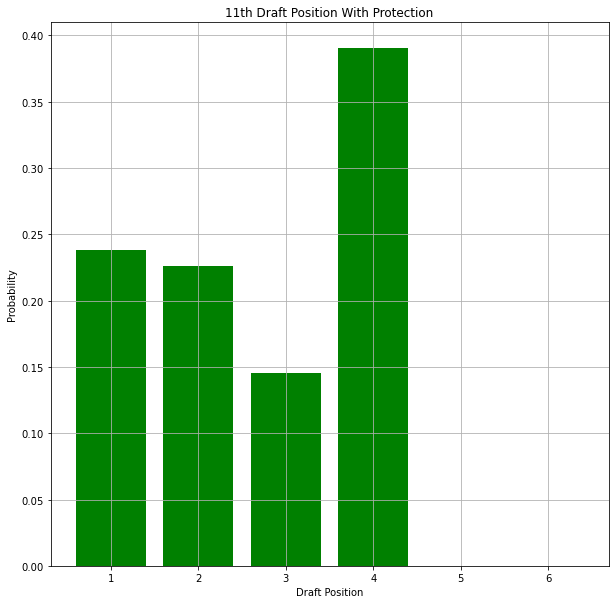

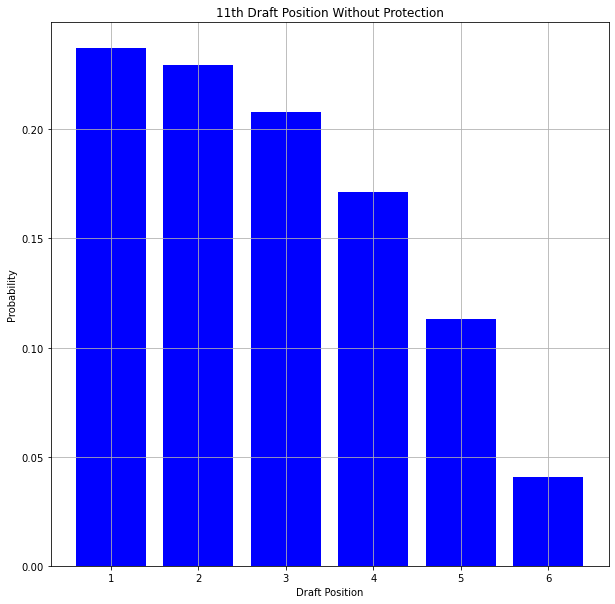

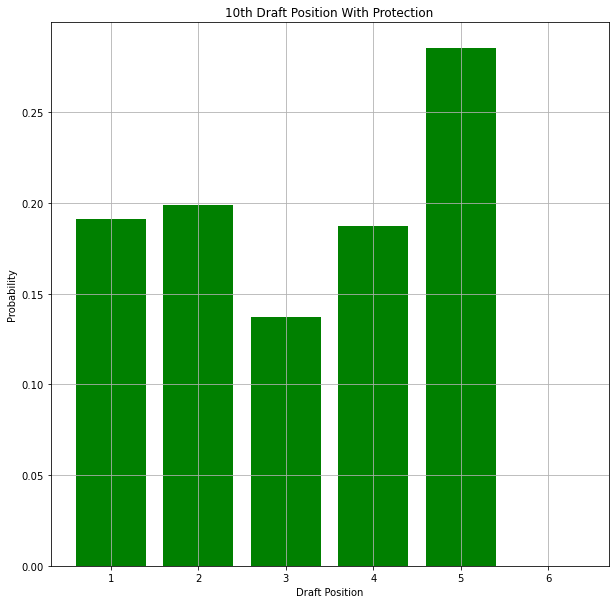

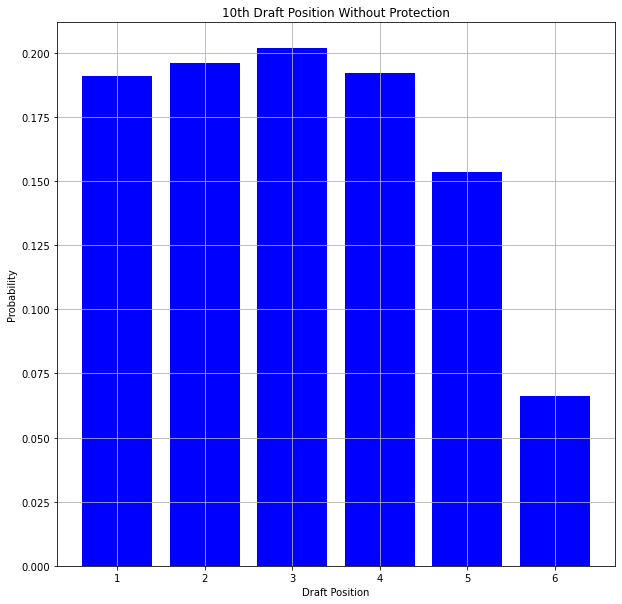

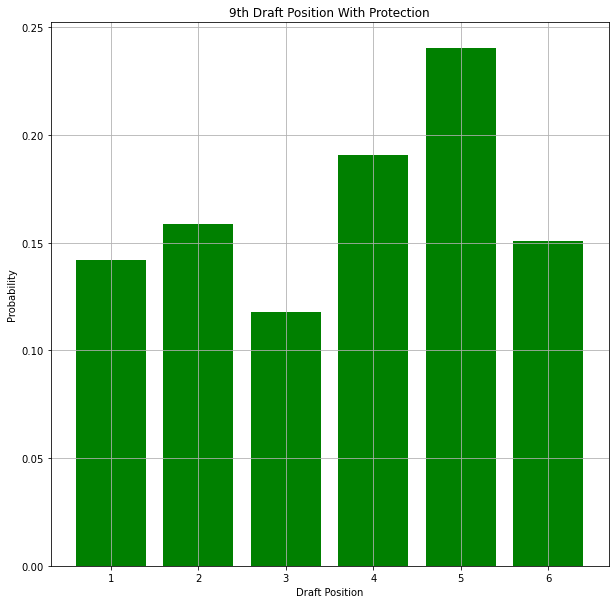

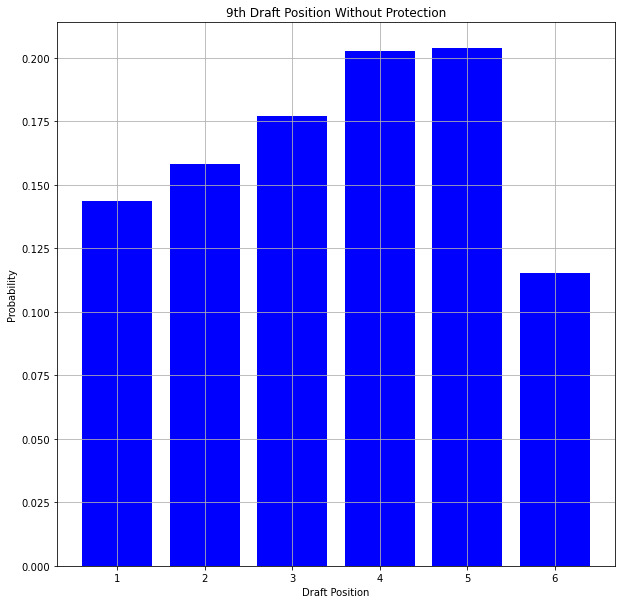

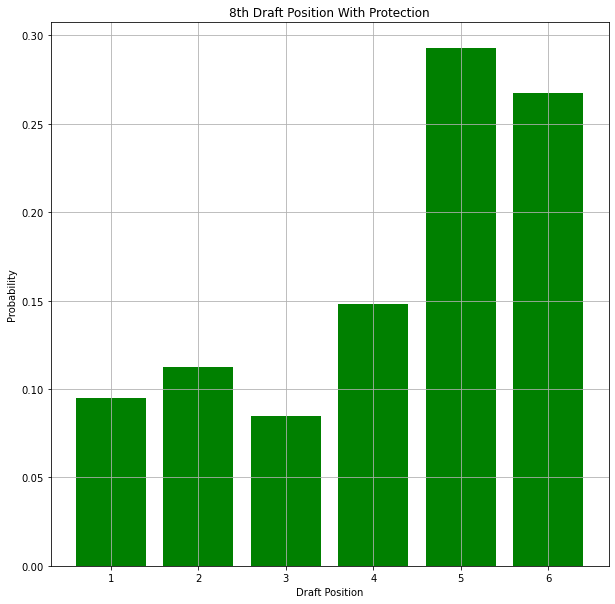

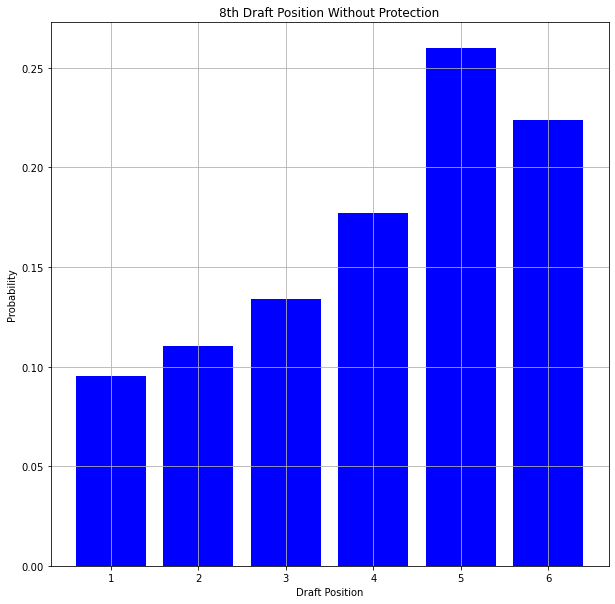

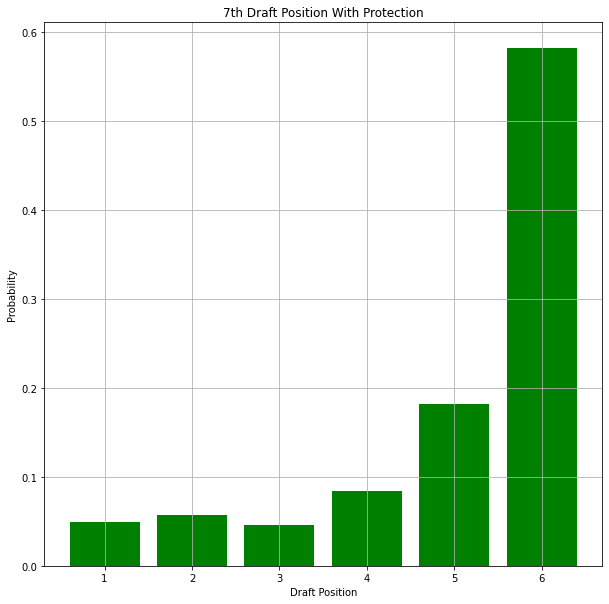

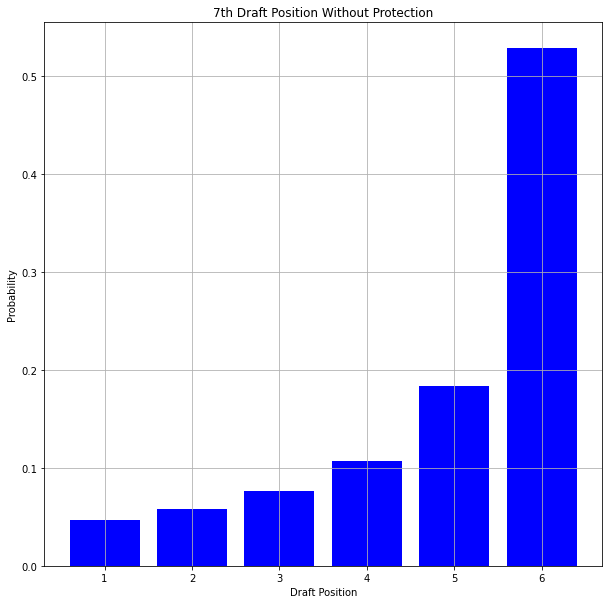

In [15]:
import matplotlib.pyplot as plt

for team in with_protection:
    plt.figure(figsize = (10,10))
    plt.title(team + ' Draft Position With Protection')
    plt.ylabel('Probability')
    plt.xlabel('Draft Position')
    plt.grid()
    plt.bar(with_protection[team].keys(), with_protection[team].values(), color='g')
    plt.show()
    
    plt.figure(figsize = (10,10))
    plt.title(team + ' Draft Position Without Protection')
    plt.ylabel('Probability')
    plt.xlabel('Draft Position')
    plt.grid()
    plt.bar(without_protection[team].keys(), without_protection[team].values(), color='b')
    plt.show()